# MNIST Multi-Layer Perceptron - Practice

## Topic - MNIST Dataset - Part I

### Step 1 - Import Tensorflow

In [1]:
# Import Tensor Flow

import tensorflow as tf

### Step 2 - Import Dataset of handwritten numbers

In [2]:
# Import dataset from example tutorials

from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Create a temporary file for the data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Indentify the tensorflow object type for the image array

type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

### Step 3 - Explore image datasets data type

In [5]:
# Review the trained images arrayu

mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# Review the data type of the trained image array

type(mnist.train.images)

numpy.ndarray

In [7]:
# Review the shape of the trained image array

## Note: Displays 55000 rows with 784 features
mnist.train.images.shape

(55000, 784)

In [8]:
# Take a sample from the array to review the content

mnist.train.images[5].shape

(784,)

In [9]:
# Reshape the sample to display the actual image elements

sample = mnist.train.images[5].reshape(28,28)
sample

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Step 3 - Visualize the image data with matplotlib

In [10]:
# Import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

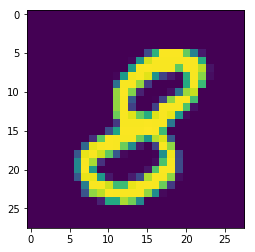

In [11]:
# Display the two-dimensional image with .imshow() method

plt.imshow(sample)

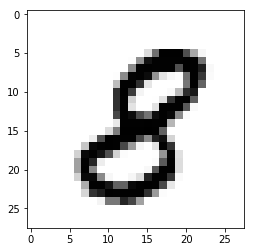

In [12]:
# Display the two-dimensional image with .imshow() method
# cmap -> alters the color of the image

plt.imshow(sample, cmap='Greys')

### Step 4 - Defining Parameters

In [13]:
# Define the (3) parameters for training

## Note:
# learning_rate -> this is how quickly we adjust the cost function (i.e. cost function 
# might be the sum of squared errors over your training set)
# training_epochs -> this is how many training cycles we go through
# batch_size -> this is the size of the batch training data

learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [14]:
# Define Network Paramters

## Note: This decides what the neural network will look like
# n_classes -> number of classes; we have written numbers 0 to 9 in the dataset, so this is 10
# n_samples -> number of samples in the dataset
# n_input -> the expected inputs; we have a 28 x 28 image that flattens to 784 in this example
# n_hidden_1/ _2 -> the number of neurons in the hidden layers (i.e. common to use 256 for images)


n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256


## Topic - MNIST Dataset - Part II

In [15]:
# Create multi-layer perceptron function

## Note:
# Function takes (3) arguments
# x -> data inputs
# weights -> random normally distributed values based on required data shape
# bias -> random normally distributed values based on required data shape

#def multilayer_perceptron(x, weights, biases):
    #'''
    #x: Placeholder for Data Input
    #weights: Dict of weights
    #biases: dict of bias values
    #'''
    
    # First Hidden Layer with RELU Activation
    # (X * W + B) -> (x = data) multiplied by (W = Weights randomly selected), then added by (B = Bias)
    #layer_1 = tf.add(tf.matmul(x, weights['h1']),biases['b1'])
    
    # Function(X * W + B) = RELU is our function -> f(x) = max(0,x) --> This is the activation part
    #layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer with RELU Activation
    # (X * W + B) -> (x = data) multiplied by (W = Weights randomly selected), then added by (B = Bias)
    #layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    
    # Function(X * W + B) = RELU is our function -> f(x) = max(0,x) --> This is the activation part
    #layer_2 = tf.nn.relu(layer_2)

In [16]:
# Create Weights Dictionary

## Note: Remember the flow from input -> to hidden layer -> to output
# tf.Variable -> allows us to be aware of state
# tf.random_normal -> allows us to generate normally distributed values for a given matrix shape
# n_classes -> allows us to create a matrix identifying the value

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

#weights = {
    #'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    #'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
#}

In [17]:
# Create Bias Dictionary

## Note: Remember the flow from input -> to hidden layer -> to output
# tf.Variable -> allows us to be aware of state
# tf.random_normal -> allows us to generate normally distributed values for a given matrix shape
# n_classes -> allows us to create a matrix identifying the value

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

#biases = {
    #'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    #'out': tf.Variable(tf.random_normal([n_classes]))
#}

In [18]:
# Create two (2) placeholders for the x and y variables

#x = tf.placeholder(tf.float32, [None,n_input])

#y = tf.placeholder(tf.float32, [None, n_classes])


In [19]:
# Create model with perceptron function

#pred = multilayer_perceptron(x, weights, biases)

## Topic - MNIST Dataset - Part II Revised

### Step 5 - Create Functions for Multi-Layer Perceptron

In [38]:
# Create placeholders for the x

x = tf.placeholder(tf.float32, [None, n_input])


In [44]:
# Create placeholders for the y

y_ = tf.placeholder(tf.float32, [None, n_classes])

In [39]:
# Create Weights object

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

W = tf.Variable(tf.zeros([n_input, n_classes]))

In [40]:
# Create Weights object

## example output => [0,0,0,1,0,0,0,0,0,0] -> this would mean the output guess is 3

b = tf.Variable(tf.zeros([n_classes]))

### Step 6 - Set the perceptron function and create the model



In [43]:
# Set the function and create the model

y = tf.nn.softmax(tf.matmul(x, W) + b)

### Step 7 - Define cost and optimizer

In [45]:
# Create the cost function

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [46]:
# Optimize the model by reducing the error
 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## Topic - MNIST Dataset - Part III - Train the Model

### Step 8 - Investigate the next_batch() method

In [21]:
# Investigate the .next_batch() method

mnist.train.next_batch()

In [51]:
# Create a batch of 10 samples

t = mnist.train.next_batch(1)
t

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [53]:
# Review the length of the tuple

len(t)

2

In [54]:
# Use tuple unpacking to see what the sample looks like

Xsamp, ysamp = t

In [55]:
# Review the Xsamp

##Note:
# This is essentially the array for the input

Xsamp

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [56]:
# Review the ysamp

##Note:
# This is essentially the encoding for the output
# example output => [0,0,0,0,1,0,0,0,0,0] -> this would mean the output guess is 4

ysamp

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

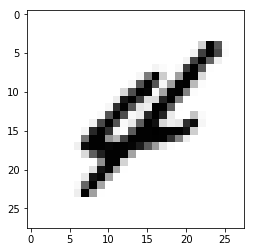

In [59]:
# Display the visual of the array sample

plt.imshow(Xsamp.reshape(28,28), cmap='Greys')

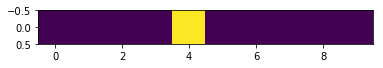

In [66]:
# Display the visual of the array sample output

plt.imshow(ysamp)

### Step 9 - Launch Interactive Session

In [67]:
# Create an interactive session to execute model

sess = tf.InteractiveSession()

In [68]:
# Initialize all variables for project
tf.global_variables_initializer().run()

### Step 10 - Train the Model

In [80]:
# Train the model

## Note:
# _ -> this is used in python when we don't need to track the value


for _ in range(training_epochs):
    # Loop through this 15x
    # This steps through each batch sample until the dataset has been completed
    batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
    # This uses the optimizer to provide back a dictionary with x and y values
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

### Step 11 - Evaluate the model

In [81]:
# Make predictions  
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [86]:
# Display prediction data type

print(correct_prediction[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [87]:
# Convert the data type to a float using the .cast() method

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [88]:
# Display the tensor flow object type

type(accuracy)

tensorflow.python.framework.ops.Tensor

### Step 12 - Pass in actual test data

In [90]:
# Review the data features

mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [91]:
# Review the data labels

mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [92]:
# Review accuracy of model

print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8973


In [ ]:
## Topic -

In [ ]:
## Topic -

In [ ]:
### Step 1 -

In [ ]:
### Step 1 -